In [2]:
# https://brian2.readthedocs.io/en/stable/resources/tutorials/3-intro-to-brian-simulations.html
from brian2 import *

Text(0, 0.5, 'Firing rate (sp/s)')

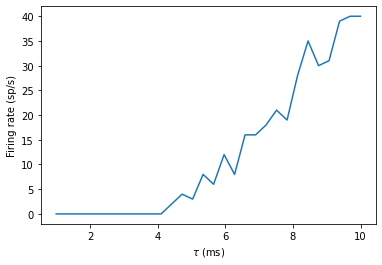

In [3]:
# Multiple runs
# How does the firing rate of a leaky integrate-and-fire neuron 
# driven by Poisson spiking neurons change depending on its membrane time constant?
start_scope()

num_inputs = 100
input_rate = 10*Hz
weight = 0.1
tau_range = linspace(1, 10, 30)*ms # Range of the membrane time constant
output_rates = []

for tau in tau_range:
    P = PoissonGroup(num_inputs, rates=input_rate) # Poisson spiking neurons (source)
    eqs = 'dv/dt = -v/tau : 1'
    G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact') # LIF neuron (target)
    S = Synapses(P, G, on_pre='v += weight')
    S.connect()
    M = SpikeMonitor(G)
    run(1*second)
    output_rates.append(M.num_spikes/second)

plot(tau_range/ms, output_rates)
xlabel(r'$\tau$ (ms)')
ylabel('Firing rate (sp/s)')

Text(0, 0.5, 'Firing rate (sp/s)')

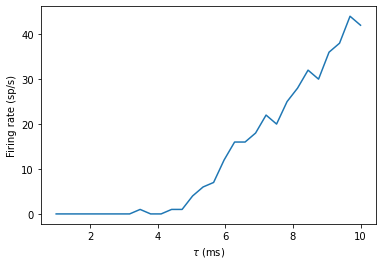

In [4]:
# Copy/restore the state of the network
start_scope()

num_inputs = 100
input_rate = 10*Hz
weight = 0.1
tau_range = linspace(1, 10, 30)*ms # Range of the membrane time constant
output_rates = []

P = PoissonGroup(num_inputs, rates=input_rate) # Poisson spiking neurons (source)
eqs = 'dv/dt = -v/tau : 1'
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact') # LIF neuron (target)
S = Synapses(P, G, on_pre='v += weight')
S.connect()
M = SpikeMonitor(G)
store() # Store the current state of the network

for tau in tau_range:
    restore()
    run(1*second)
    output_rates.append(M.num_spikes/second)

plot(tau_range/ms, output_rates)
xlabel(r'$\tau$ (ms)')
ylabel('Firing rate (sp/s)')

Text(0, 0.5, 'Firing rate (sp/s)')

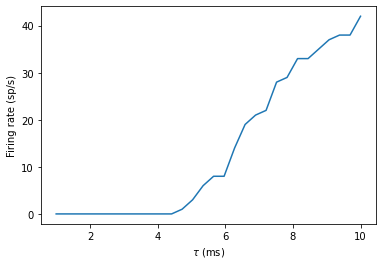

In [9]:
# Run Poisson once so spikes are the same each time
start_scope()

num_inputs = 100
input_rate = 10*Hz
weight = 0.1
tau_range = linspace(1, 10, 30)*ms # Range of the membrane time constant
output_rates = []

P = PoissonGroup(num_inputs, rates=input_rate) # Poisson spiking neurons (source)
MP = SpikeMonitor(P)
net = Network(P, MP)
net.run(1*second) # Run and store Poisson spikes
spikes_i = MP.i
spikes_t = MP.t
SGG = SpikeGeneratorGroup(num_inputs, spikes_i, spikes_t)

eqs = 'dv/dt = -v/tau : 1'
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact') # LIF neuron (target)
S = Synapses(SGG, G, on_pre='v += weight')
S.connect()
M = SpikeMonitor(G)

net = Network(SGG, G, S, M)
net.store() # Store the current state of the network

for tau in tau_range:
    net.restore()
    net.run(1*second)
    output_rates.append(M.num_spikes/second)

plot(tau_range/ms, output_rates)
xlabel(r'$\tau$ (ms)')
ylabel('Firing rate (sp/s)')

WARNING    "tau" is an internal variable of group "neurongroup_2", but also exists in the run namespace with the value 10. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Text(0, 0.5, 'Firing rate (sp/s)')

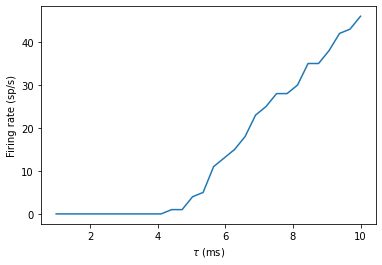

In [10]:
# Run simulation on multiple instances of the same neuron
start_scope()

num_inputs = 100
input_rate = 10*Hz
weight = 0.1
tau_range = linspace(1, 10, 30)*ms # Range of the membrane time constant
num_tau = len(tau_range)

P = PoissonGroup(num_inputs, rates=input_rate) # Poisson spiking neurons (source)
eqs = '''
dv/dt = -v/tau : 1
tau : second
'''
G = NeuronGroup(num_tau, eqs, threshold='v>1', reset='v=0', method='exact')
G.tau = tau_range
S = Synapses(P, G, on_pre='v += weight')
S.connect()
M = SpikeMonitor(G)
run(1*second)
output_rates = M.count/second # Firing rate

plot(tau_range/ms, output_rates)
xlabel(r'$\tau$ (ms)')
ylabel('Firing rate (sp/s)')

In [ ]:
# Mean and standard deviation of the interspike intervals
trains = M.spike_trains()
isi_mu = full(num_tau, nan)*second
isi_std = full(num_tau, nan)*second
for idx in range(num_tau):
    train = diff(trains[idx])
    if len(train)>1:
        isi_mu[idx] = mean(train)
        isi_std[idx] = std(train)
errorbar(tau_range/ms, isi_mu/ms, yerr=isi_std/ms)
xlabel(r'$\tau$ (ms)')
ylabel('Interspike interval (ms)');